In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import re

## Data Preparation

In [31]:
TESS = '../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data'
SAVEE = '../input/savee-database/AudioData'
RAVDESS= '../input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'

### RAVDESS dataset

In [23]:
ravdess_dir_list = os.listdir(RAVDESS)
print(ravdess_dir_list)
print(os.listdir(RAVDESS + ravdess_dir_list[0]))

['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']
['03-01-08-01-01-01-02.wav', '03-01-01-01-01-01-02.wav', '03-01-07-02-01-02-02.wav', '03-01-07-01-01-02-02.wav', '03-01-01-01-02-01-02.wav', '03-01-06-02-02-01-02.wav', '03-01-04-01-02-01-02.wav', '03-01-01-01-01-02-02.wav', '03-01-02-01-01-02-02.wav', '03-01-03-01-01-01-02.wav', '03-01-07-01-02-02-02.wav', '03-01-05-01-01-02-02.wav', '03-01-03-01-01-02-02.wav', '03-01-06-02-01-02-02.wav', '03-01-08-02-02-01-02.wav', '03-01-06-02-01-01-02.wav', '03-01-06-01-02-02-02.wav', '03-01-02-01-02-01-02.wav', '03-01-04-02-02-02-02.wav', '03-01-03-02-01-02-02.wav', '03-01-07-01-01-01-02.wav', '03-01-08-02-01-01-02.wav', '03-01-05-02-01-01-02.wav', '03-01-03-02-02-01-02.wav', '03-01-06-01-01-01-02.wav', '03-01-05-

In [24]:
emotions = []
audios = []
for actor in ravdess_dir_list:
    audio = os.listdir(RAVDESS + actor)
    for file in audio:
        filename = file.split('.')[0]
        identifier = filename.split('-')
        emotions.append(int(identifier[2]))
        audios.append(RAVDESS + dir + '/' + file)
        
emotion_df = pd.DataFrame(emotions, columns=['Emotion'])
audio_df = pd.DataFrame(audios, columns=['Audio'])
Ravdess_df = pd.concat([emotion_df, audio_df], axis=1)
    
Ravdess_df.Emotion.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

TypeError: can only concatenate str (not "list") to str

In [ ]:
plt.title('Count of Emotions in RAVDESS', size=16)
plt.style.use('seaborn-pastel')
sns.countplot(Ravdess_df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### TESS dataset

In [32]:
tess_dir_list = os.listdir(TESS)
print(tess_dir_list)
print(os.listdir(TESS +'/'+ tess_dir_list[0]))

['YAF_fear', 'OAF_angry', 'OAF_Fear', 'OAF_disgust', 'OAF_neutral', 'YAF_angry', 'OAF_Sad', 'YAF_disgust', 'YAF_neutral', 'OAF_Pleasant_surprise', 'YAF_happy', 'OAF_happy', 'YAF_sad', 'YAF_pleasant_surprised']
['YAF_home_fear.wav', 'YAF_youth_fear.wav', 'YAF_near_fear.wav', 'YAF_search_fear.wav', 'YAF_pick_fear.wav', 'YAF_dodge_fear.wav', 'YAF_void_fear.wav', 'YAF_sheep_fear.wav', 'YAF_pain_fear.wav', 'YAF_fall_fear.wav', 'YAF_rag_fear.wav', 'YAF_when_fear.wav', 'YAF_date_fear.wav', 'YAF_such_fear.wav', 'YAF_burn_fear.wav', 'YAF_rose_fear.wav', 'YAF_choice_fear.wav', 'YAF_ring_fear.wav', 'YAF_shall_fear.wav', 'YAF_boat_fear.wav', 'YAF_wire_fear.wav', 'YAF_death_fear.wav', 'YAF_love_fear.wav', 'YAF_came_fear.wav', 'YAF_ripe_fear.wav', 'YAF_pike_fear.wav', 'YAF_chat_fear.wav', 'YAF_keg_fear.wav', 'YAF_doll_fear.wav', 'YAF_vote_fear.wav', 'YAF_cheek_fear.wav', 'YAF_limb_fear.wav', 'YAF_turn_fear.wav', 'YAF_bite_fear.wav', 'YAF_mop_fear.wav', 'YAF_yes_fear.wav', 'YAF_thin_fear.wav', 'YAF_s

In [33]:
emotions = []
audios = []
for dir in tess_dir_list:
    directories = os.listdir(TESS +'/'+ dir)
    for file in directories:
        filename = file.split('.')[0]
        emotion = filename.split('_')[2]
        if emotion=='ps':
            emotions.append('surprise')
        else:
            emotions.append(emotion)
        audios.append(TESS + '/'+dir + '/' + file)
        
emotion_df = pd.DataFrame(emotions, columns=['Emotion'])
audio_df = pd.DataFrame(audios, columns=['Audio File Path'])
tess_df = pd.concat([emotion_df, audio_df], axis=1)
    
# tess_df.Emotion.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
tess_df.head()


,Emotion,Audio File Path
0,fear,../input/toronto-emotional-speech-set-tess/tes...
1,fear,../input/toronto-emotional-speech-set-tess/tes...
2,fear,../input/toronto-emotional-speech-set-tess/tes...
3,fear,../input/toronto-emotional-speech-set-tess/tes...
4,fear,../input/toronto-emotional-speech-set-tess/tes...


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


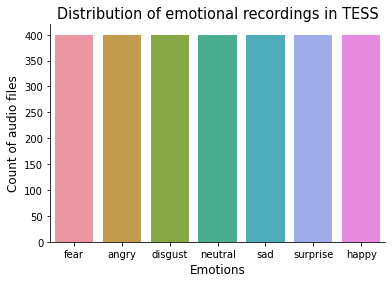

In [34]:
plt.title('Distribution of emotional recordings in TESS', size=14.5)
plt.style.use('seaborn-pastel')
sns.countplot(tess_df.Emotion)
plt.ylabel('Count of audio files', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

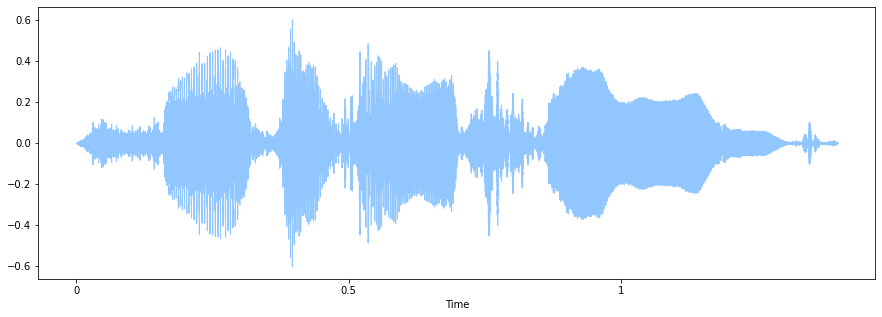

In [35]:
import librosa
import librosa.display
# lets play a fearful track 
# fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 
fname = tess_df['Audio File Path'][0]
data, sampling_rate = librosa.load(fname)

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)



### SAVEE dataset

In [25]:
savee_dir_list = os.listdir(SAVEE)
print(savee_dir_list)
print(os.listdir(SAVEE + '/'+savee_dir_list[0]))

['DC', 'Info.txt', 'JE', 'KL', 'JK']
['n26.wav', 'su06.wav', 'su01.wav', 'h10.wav', 'su10.wav', 'sa02.wav', 'f08.wav', 'h13.wav', 'n07.wav', 'su04.wav', 'f01.wav', 'su13.wav', 'su12.wav', 'd13.wav', 'a13.wav', 'f07.wav', 'h02.wav', 'f06.wav', 'n14.wav', 'd15.wav', 'f12.wav', 'su08.wav', 'a08.wav', 'd09.wav', 'f10.wav', 'su14.wav', 'sa04.wav', 'n19.wav', 'su05.wav', 'n17.wav', 'sa14.wav', 'n01.wav', 'n18.wav', 'd12.wav', 'n02.wav', 'a05.wav', 'f05.wav', 'n09.wav', 'd02.wav', 'f15.wav', 'h09.wav', 'h06.wav', 'sa06.wav', 'n28.wav', 'a01.wav', 'f03.wav', 'd11.wav', 'a02.wav', 'sa11.wav', 'n25.wav', 'n11.wav', 'sa10.wav', 'h03.wav', 'a12.wav', 'n22.wav', 'sa08.wav', 'f09.wav', 'd04.wav', 'h01.wav', 'n08.wav', 'd07.wav', 'a03.wav', 'h14.wav', 'd10.wav', 'n29.wav', 'su11.wav', 'sa15.wav', 'h11.wav', 'h05.wav', 'su09.wav', 'a14.wav', 'a10.wav', 'd08.wav', 'n24.wav', 'f04.wav', 'n21.wav', 'su15.wav', 'n16.wav', 'f13.wav', 'f11.wav', 'd14.wav', 'sa01.wav', 'h15.wav', 'n03.wav', 'f14.wav', 'n04.w

In [26]:
emotions = []
audios = []
for actor in savee_dir_list:
    if actor !='Info.txt':
        dir = os.listdir(SAVEE +'/'+ actor)

    for file in dir:
        filename = file.split('.')[0]
        emotion = re.split('\d+',filename)[0]
        if emotion=='a':
            emotions.append('angry')
        elif emotion=='d':
            emotions.append('disgust')
        elif emotion=='f':
            emotions.append('fear')
        elif emotion=='h':
            emotions.append('happy')
        elif emotion=='n':
            emotions.append('neutral')
        elif emotion=='sa':
            emotions.append('sad')
        else:
            emotions.append('surprise')
        audios.append( SAVEE + '/' + file)
        
emotion_df = pd.DataFrame(emotions, columns=['Emotion'])
audio_df = pd.DataFrame(audios, columns=['Audio'])
savee_df = pd.concat([emotion_df, audio_df], axis=1)
    
# tess_df.Emotion.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
savee_df.head()

,Emotion,Audio
0,neutral,../input/savee-database/AudioData/n26.wav
1,surprise,../input/savee-database/AudioData/su06.wav
2,surprise,../input/savee-database/AudioData/su01.wav
3,happy,../input/savee-database/AudioData/h10.wav
4,surprise,../input/savee-database/AudioData/su10.wav


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


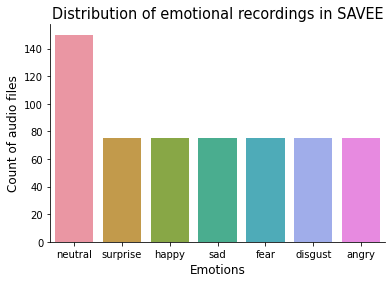

In [27]:
plt.title('Distribution of emotional recordings in SAVEE', size=14.5)
plt.style.use('seaborn-pastel')
sns.countplot(savee_df.Emotion)
plt.ylabel('Count of audio files', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [28]:
data_path = pd.concat([savee_df, tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

NameError: name 'tess_df' is not defined

In [ ]:
plt.title('Count of Emotions', size=16)
plt.style.use('seaborn-pastel')
sns.countplot(data_path.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [36]:
!pip install pydub
!pip install noisereduce
!pip install json-tricks

In [37]:
import numpy as np
import os
from json_tricks import dump, load

from pydub import AudioSegment, effects
import librosa
import noisereduce as nr

import tensorflow as tf
import keras
import sklearn

## Dataset: TESS 

In [38]:
tess_df.head()

,Emotion,Audio File Path
0,fear,../input/toronto-emotional-speech-set-tess/tes...
1,fear,../input/toronto-emotional-speech-set-tess/tes...
2,fear,../input/toronto-emotional-speech-set-tess/tes...
3,fear,../input/toronto-emotional-speech-set-tess/tes...
4,fear,../input/toronto-emotional-speech-set-tess/tes...


## Preprocessing and feature extraction for one file

In [39]:
sample = tess_df['Audio File Path'][0]
sample

'../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav'

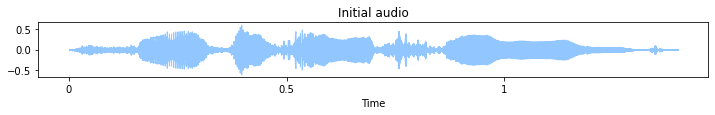

In [40]:
data, sampling_rate = librosa.load(sample)

plt.figure(figsize=(12, 1))
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Initial audio')

rawsound = AudioSegment.from_file(sample)
rawsound

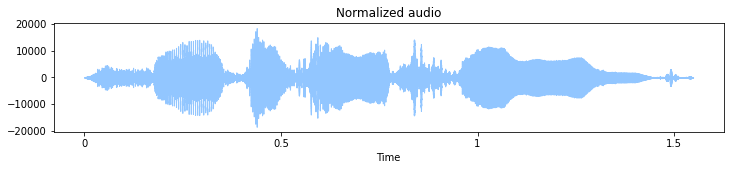

In [41]:
# 2. Normalize to +5.0 dBFS, Transform audio signals to an array.

normalizedsound = effects.normalize(rawsound, headroom = 5.0) 
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')

plt.figure(figsize=(12,2))
librosa.display.waveshow(normal_x, sr=sampling_rate)
plt.title('Normalized audio')

normalizedsound

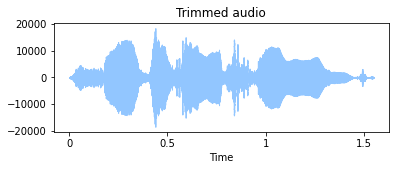

In [42]:
# 3. Trim silence in the beginning and end.
import IPython.display as ipd
xt, index = librosa.effects.trim(normal_x, top_db = 30)

plt.figure(figsize=(6,2))
librosa.display.waveshow(xt, sr=sampling_rate)
plt.title('Trimmed audio')

ipd.display(ipd.Audio(data = xt, rate=sampling_rate))

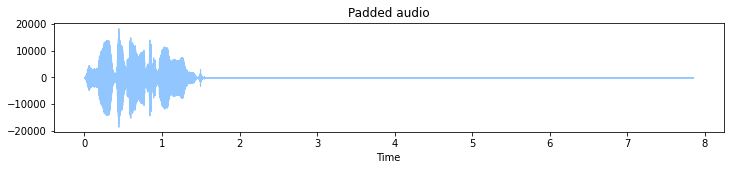

In [43]:
# 4. Right-side padding for length equalization.
#    173056 = maximum lengthed audio (the extraction of this value is performed in the "SpeechEmotionRecognion_Model" notebook.)

padded_x = np.pad(xt, (0, 173056-len(xt)), 'constant')

plt.figure(figsize=(12,2))
librosa.display.waveshow(padded_x, sr=sampling_rate)
plt.title('Padded audio')

ipd.display(ipd.Audio(data = padded_x, rate=sampling_rate))

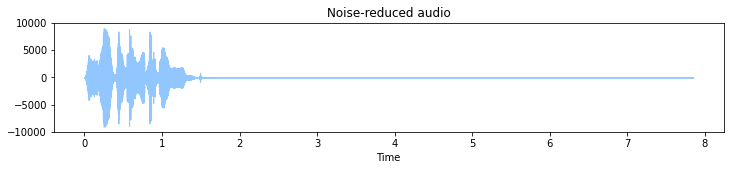

In [44]:
# 5. Noise reduction
#    Note: although there is no noise to reduce from RAVDESS nor TESS databases, reduce_noise function by noisereduce library attributes a uniform stamper to the audio files. 

final_x = nr.reduce_noise(padded_x, sr=sampling_rate)

plt.figure(figsize=(12,2))
librosa.display.waveshow(final_x, sr=sampling_rate)
plt.title('Noise-reduced audio')

ipd.display(ipd.Audio(data = final_x, rate=sampling_rate))

In [46]:
# Feature extraction

frame_length = 2048
hop_length = 512

f1 = librosa.feature.rms(final_x, frame_length=frame_length, hop_length=hop_length) # Energy - Root Mean Square (RMS)
print('Energy shape:', f1.shape)
f2 = librosa.feature.zero_crossing_rate(final_x, frame_length=frame_length, hop_length=hop_length) # Zero Crossed Rate (ZCR)
print('ZCR shape:', f2.shape)
f3 = librosa.feature.mfcc(final_x, sr=sampling_rate, S=None, n_mfcc=13, hop_length = hop_length) # MFCCs
print('MFCCs shape:', f3.shape)

Energy shape: (1, 339)
ZCR shape: (1, 339)
MFCCs shape: (13, 339)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Pass y=[ 9.045697  -7.166507  -3.1203494 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Pass y=[ 9.045697  -7.166507  -3.1203494 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # Remove the CWD from sys.path while we load stuff.


## Preprocessing (entire dataset)

In [47]:
# Emotion kind validation function for TESS database, due to emotions written within the file names.
def find_emotion_T(name): 
        if('neutral' in name): return "01"
        elif('happy' in name): return "03"
        elif('sad' in name): return "04"
        elif('angry' in name): return "05"
        elif('fear' in name): return "06"
        elif('disgust' in name): return "07"
        elif('ps' in name): return "08"
        else: return "-1"
        
        
# 'emotions' list fix for classification purposes:
#     Classification values start from 0, Thus an 'n = n-1' operation has been executed for both RAVDESS and TESS databases:
def emotionfix(e_num):
    if e_num == "01":   return 0 # neutral
    elif e_num == "02": return 1 # calm
    elif e_num == "03": return 2 # happy
    elif e_num == "04": return 3 # sad
    elif e_num == "05": return 4 # angry
    elif e_num == "06": return 5 # fear
    elif e_num == "07": return 6 # disgust
    else:               return 7 # suprised

In [48]:
# Maximum samples count for padding purposes.

sample_lengths = []
folder_path = '../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data'

for subdir, dirs, files in os.walk(folder_path):
  for file in files: 
    x, sr = librosa.load(path = os.path.join(subdir,file), sr = None)
    xt, index = librosa.effects.trim(x, top_db=30)
     
    sample_lengths.append(len(xt))

print('Maximum sample length:', np.max(sample_lengths))  

Maximum sample length: 131072


In [50]:
import time
tic = time.perf_counter()

# Initialize data lists
rms = []
zcr = []
mfcc = []
emotions = []

# Initialize variables
total_length = 173056 # desired frame length for all of the audio samples.
frame_length = 2048
hop_length = 512

folder_path = '../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data'


for subdir, dirs, files in os.walk(folder_path):
  for file in files: 

    # Fetch the sample rate.
      _, sr = librosa.load(path = os.path.join(subdir,file), sr = None) # sr (the sample rate) is used for librosa's MFCCs. '_' is irrelevant.
    # Load the audio file.
      rawsound = AudioSegment.from_file(os.path.join(subdir,file)) 
    # Normalize the audio to +5.0 dBFS.
      normalizedsound = effects.normalize(rawsound, headroom = 0) 
    # Transform the normalized audio to np.array of samples.
      normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')
    # Trim silence from the beginning and the end.
      xt, index = librosa.effects.trim(normal_x, top_db=30)
      #print(file,"\t", len(xt), "\t", rawsound.dBFS, "\t", normalizedsound.dBFS) #--QA purposes if needed-- 
    # Pad for duration equalization.
      padded_x = np.pad(xt, (0, total_length-len(xt)), 'constant')
    # Noise reduction.
      final_x = nr.reduce_noise(padded_x, sr=sr) #updated 03/03/22
       
   # Features extraction 
      f1 = librosa.feature.rms(final_x, frame_length=frame_length, hop_length=hop_length) # Energy - Root Mean Square   
      f2 = librosa.feature.zero_crossing_rate(final_x , frame_length=frame_length, hop_length=hop_length, center=True) # ZCR      
      f3 = librosa.feature.mfcc(final_x, sr=sr, n_mfcc=13, hop_length = hop_length) # MFCC
      
   # Emotion extraction from the different databases
      if (find_emotion_T(file) != "-1"): #TESS database validation
            name = find_emotion_T(file)
      else:                              #RAVDESS database validation
            name = file[6:8]                      

   # Filling the data lists  
      rms.append(f1)
      zcr.append(f2)
      mfcc.append(f3)
      emotions.append(emotionfix(name)) 

toc = time.perf_counter()
print(f"Running time: {(toc - tic)/60:0.4f} minutes")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: Pass y=[ 16.533003 -12.748628  -5.385498 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: Pass y=[ 16.533003 -12.748628  -5.385498 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: Pass y=[  7.877422   1.361957 -12.310234 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: Pass y=[  7.877422   1.361957 -12.310234 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

Running time: 9.2171 minutes
